## Week 7 (Feb 27)
# PS3 Discussion: Quantifying Uncertainty with Standard Errors and p-values


## 1. Is the distribution of sample means really normally distributed?

In [4]:
# creating the sides of a die
dice <- c(1:6)

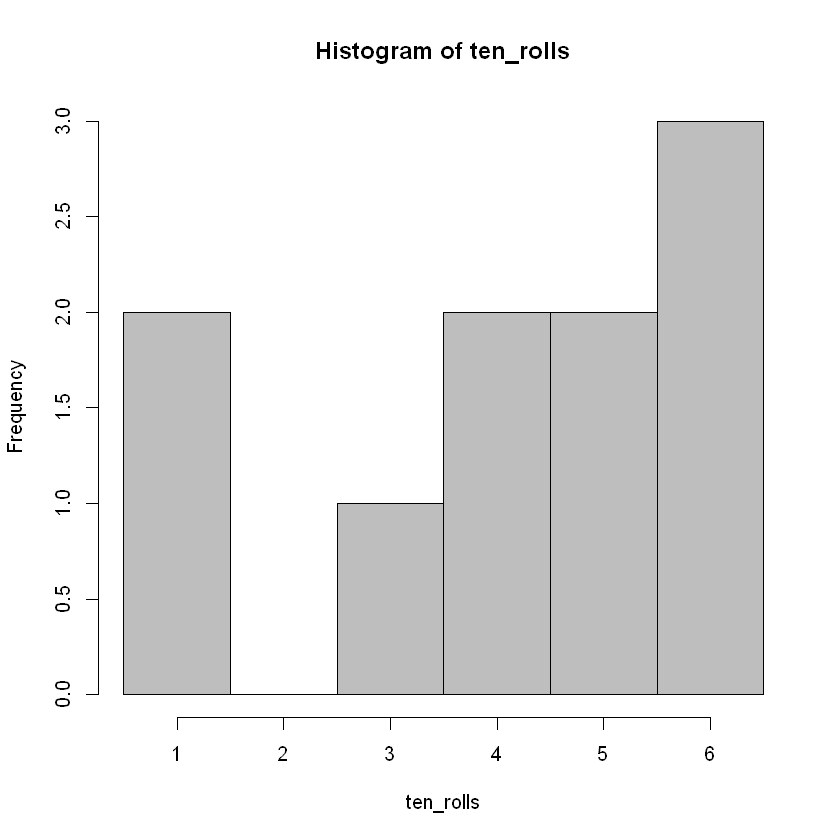

In [5]:
# Let's see the distribution of sides if we roll a die 10 times
ten_rolls <- sample(dice, 10, replace = TRUE) # What is the sample size here?
hist(ten_rolls, col = "gray", breaks = c(0.5:6.5))

# Does this look like what you expect? Why? 
# Is this the distribution of sample means, or is this the distribution of all values in one sample?

In [7]:
# What's the standard deviation of our 10 rolls? 
sd(NULL) #replace NULL and calculate the value


# What's the mean of 100 rolls? 
mean(NULL) #replace NULL and calculate the value


[1] NA

Warning message in mean.default(NULL):
"argument is not numeric or logical: returning NA"

[1] NA

## Quick Check 1

What is the standard error of the `ten_rolls` sample above?

Recall: standard error, which comes in when one is inferring a population quantity from the sample quantity is `standard deviation of the sample / square root of the sample size`

In [22]:
standard_error <- sd(ten_rolls)/sqrt(length(ten_rolls))
standard_error


[1] 0.6373169

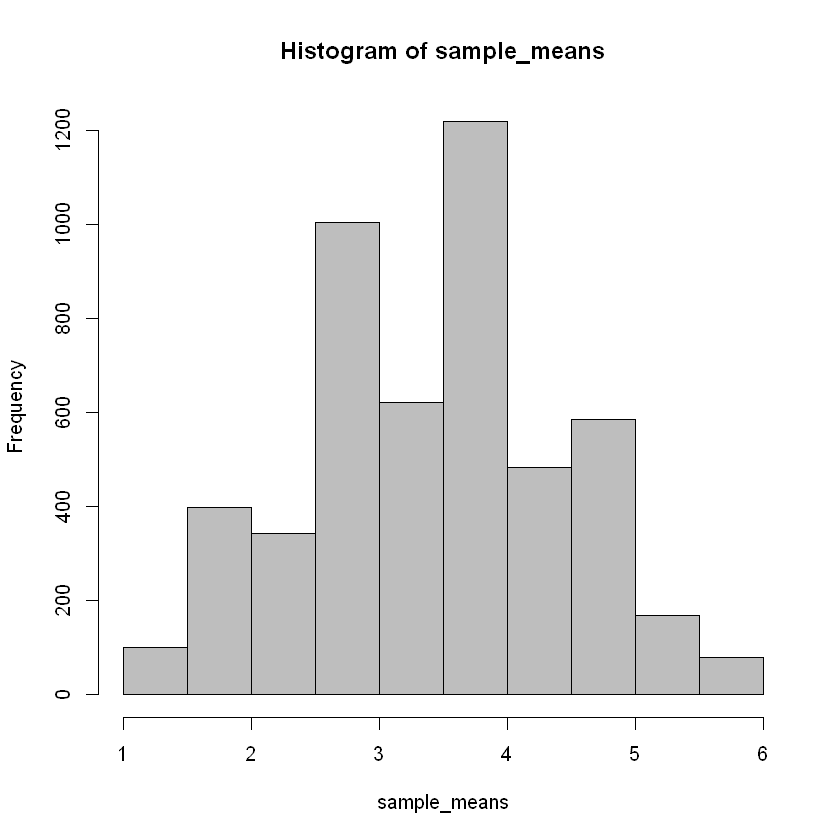

In [11]:
# Let's do simulations: take 3 rolls for 5000 times, and calculate the mean for each 3 rolls
# Just run the codes below
# the "THREE ROLLS" is taking one sample. For example, it's one sample of the study's participants.
# here, three is the size of one sample.

sample_means <- array()

for(i in c(1:5000)){
    new_rolls <- sample(dice, 3, replace = TRUE)
    sample_means[i] <- mean(new_rolls)
}
# Distribution of sample means
hist(sample_means, col = "gray")

# What's different about this graph versus the first?

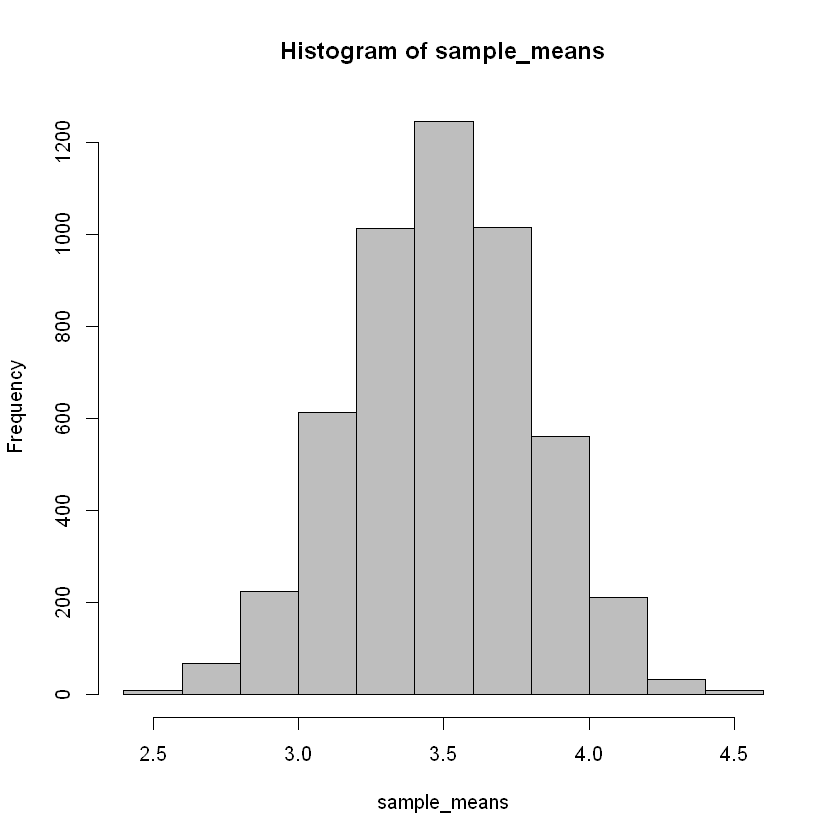

In [83]:

for(i in c(1:5000)){
    new_rolls <- sample(dice, 30, replace = TRUE)
    sample_means[i] <- mean(new_rolls)
}
# Distribution of sample means
hist(sample_means, col = "gray")

# What's different about this graph versus the first?
# Change the 5 in the above code to 10 and see how it's different.
# Then, change it to 20 and 30

Okay, as the sample size becomes larger (3->5->10->20->30-> ...), the sampling distribution does seem to approximate a normaldistribution. We can see it with our eyes, but let's take one step further.

Now let's try to compare the SD of both cases, to see if the sampling distribution truly approximates a normal distribution

In [36]:
# SE = SD of the sample mean when N is 10
for(i in c(1:5000)){
    new_rolls <- sample(dice, 10, replace = TRUE)
    sample_means[i] <- mean(new_rolls)
}

sd(sample_means)  #standard 
# Compare to your mathematical calculation from earlier:
standard_error

# Notice the similarity! But why are they different?

[1] 0.5394553

[1] 0.6373169

In [37]:
# When Sample size is 20
for(i in c(1:5000)){
    new_rolls <- sample(dice, 20, replace = TRUE)
    sample_means[i] <- mean(new_rolls)
}

sd(sample_means)

twenty_rolls <- sample(dice, 20, replace = TRUE) # What is the sample size here?
standard_error_20 <- sd(twenty_rolls)/sqrt(length(twenty_rolls))
standard_error_20

sd(sample_means) - standard_error_20   #difference

[1] 0.3812303

[1] 0.3423987

[1] 0.03883163

In [41]:
# When sample size is 30
for(i in c(1:5000)){
    new_rolls <- sample(dice, 30, replace = TRUE)
    sample_means[i] <- mean(new_rolls)
}

sd(sample_means)

thirty_rolls <- sample(dice, 30, replace = TRUE) # What is the sample size here?
standard_error_30 <- sd(thirty_rolls)/sqrt(length(thirty_rolls))
standard_error_30

sd(sample_means)- standard_error_30

# change the sample size to 50, or even greater to see what you find.

[1] 0.312914

[1] 0.2958849

[1] 0.01702906

### Takeaway: Sampling distribution approximates a normal distribution given the size of the sample is sufficiently large! (greater than 30) Now we can use this property to calculate the area under the curve of an ATE! 

# 2. Standard Errors--a measure of Uncertainty: 
## 2-1. how much the data 'moves around' across different independent samples

--------

We'll look at the data on exam scores in an anonymous large undergraduate class where students were randomly assigned to attend tutoring. The final scores for all of the students in the course were recorded and participation in tutoring was noted. 

-------

**Data Dictionary/Codebook**

`Mentored`: `TRUE` = student participated in tutoring, `FALSE` = student did not participate in tutoring

`Final`: student score on final

--------


In [63]:
# Run this cell
library(estimatr)
scores <- read.csv("weekly_materials/final_scores.csv") 

In [ ]:
# Are you curious of how the score distribution looks like?
hist(scores$Final)

How did students do on the Final? Let's have a look at the average score and standard deviation in the class.

In [44]:
# mean


[1] 62.43841

In [45]:
# SD


[1] 25.71275

Imagine that I am only able to get data for 50 students. I randomly sampled 50 students and asked them for their final scores. Now we treat the entire dataset/class as the population, and the 50 students as a sample.  

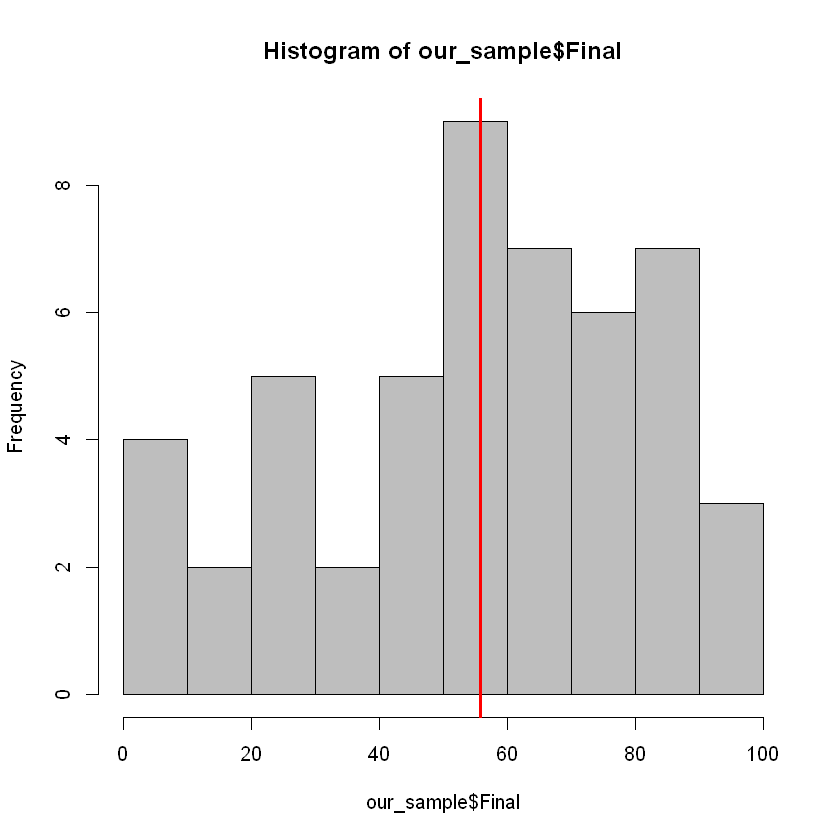

In [76]:
# Just run codes below, you do not need to understand
# Run the code a few times. 

our_sample <- scores[sample(1:nrow(scores), 50, replace = FALSE),] 
hist(our_sample$Final, col = "gray")
abline(v = mean(our_sample$Final), col = "red", lwd = 3) 
# draw a red line to show the mean Final score in the 50 students sample

In [ ]:
# What's the mean of the Final score for these 50 students?
NULL

# the standard deviation of 50 students?
NULL

Compare this to the mean of all of the students in the dataset! 

If we did this 1000 times, what are all of the potential outcomes? Let's take a look at the first 10:

In [57]:
# Just run codes below, you do not need to understand
samples <- list()
sample_means <- array()

for(i in c(1:1000)){
    samples[i] <- list(scores[sample(1:nrow(scores), 50, replace = FALSE),]) # sample 50 students without replacement
    sample_means[i] <- mean(samples[[i]]$Final) # calculate their average score
}

head(sample_means, 10)

[1] 59.12 62.52 66.14 61.00 60.49 59.16 65.19 62.55 65.12 68.40

In [53]:
# Here's the range of outcomes we got with 1000 different samples:
min(sample_means)
max(sample_means)

[1] 49.52

[1] 75.15

## 2-2. Standard Error: distance of sample means from the true/population mean

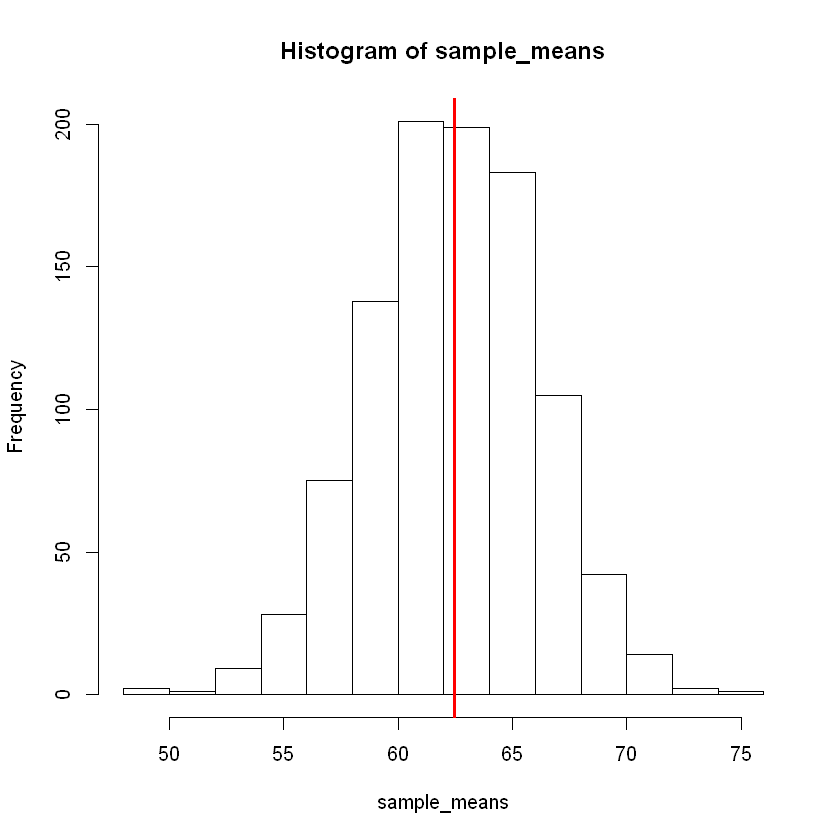

In [54]:
# Let's have a look at the histogram
hist(sample_means)
abline(v = mean(scores$Final), col = "red", lwd = 3) # draw a red line to show the average of the sample means 

# Recall: no matter what type of distribution from the population, sampling distribution (i.e., the distribution of the sample means) will always have a Normal Distribution.

## Standard Error of Difference in Means

So far, the above 'standard error' is from estimating the population mean from a sample. What about the case of comparing sample means? The formula for the standard error of the difference in means is as follows:

$$Standard Error_{twosample} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

where $s_1$ is the standard deviation of 'sample 1'

Compare this with the standard error of a single sample:

$$Standard Error_{onesample} = \sqrt{\frac{s^2_1}{n_1} }$$

In [78]:
s1 <- ... #standard dev for not tutored
s2 <- ... #standard dev for tutored
n1 <- ... #sample size of not tutored, using the length function
n2 <- ... #sample size of tutored, using the length function

se <- ... #mathematically calculate using the formula above
se

ERROR: Error in eval(expr, envir, enclos): '...'가 잘못된 맥락에서 사용되었습니다


In [82]:
library(estimatr)
#let's find out the score difference between the tutored and the rest.

difference_in_means(data=scores, Final ~ Mentored, condition1="FALSE",condition2="TRUE")

Design:  Standard 
             Estimate Std. Error  t value     Pr(>|t|) CI Lower CI Upper
MentoredTRUE 18.70845   1.180301 15.85057 1.684749e-52 16.39327 21.02363
                   DF
MentoredTRUE 1526.994

Mentored,Final
FALSE,82.0
FALSE,82.0
FALSE,82.0
FALSE,82.0
FALSE,82.0
TRUE,82.0
TRUE,82.0
TRUE,82.0
TRUE,82.0
TRUE,82.0


What does the value we got for the standard error tell us?

## Statistical Significance

Back to our original question: Did receiving tutoring affect student performance on the Final? 

**Null Hypothesis:** Tutoring had no effect on Final Scores- scores for students who did not receive tutoring were the same as scores for students who did receive tutoring.  
**Alternative Hypothesis:** Tutoring did have an effect on Final Scores- scores for students who did not receive tutoring were different from scores for students who did receive tutoring.

### t- statistic

The t-statistic describes how likely an estimate of the size we saw would arise by chance even if there is no treatment effect.

Let's compare the average Final score for the students that were tutored in our sample of 50 students to the sample distribution of means if there were no treatment effect (not tutored).

In [ ]:
#Find the average Final performance for the students that were tutored in our sample
mean_sample_tutored = NULL
mean_sample_tutored #our estimate from the sample

In [ ]:
#Finding means Final score for students not tutored in samples
#Run this cell, you do not need to understand the code here

no_effect_means <- array() 
no_effect_scores <- numeric(0)
for(i in c(1:1000)){
    no_effect_means[i] <- mean(samples[[i]][!samples[[i]]$Mentored,]$Final)
    no_effect_scores = c(no_effect_scores, samples[[i]][!samples[[i]]$Mentored,]$Final)
}

In [ ]:
#Visualize our results
hist(no_effect_means, col = "gray")#, xlim = range(40, 75))
abline(v = mean_sample_tutored, col = "red", lwd = 3) # draw a red line to show the mean of the tutored group, and compare

In [ ]:
# We already have the mean for the tutored students (mean_sample_tutored)
# First, find the mean for the students who were not tutored in our sample
mean_sample_not_tutored <- ...

estimate <- ...
t_statistic <- ...

estimate #print estimate
t_statistic #print t-statistic

Is this t-statistic larger than 1.96 or smaller than -1.96?
What does it tell us about the effect of our treatment?

### Using the difference_in_means() function

Today's exercise so far was simply to show the statistical intuition behind statistical processes! In practice, we'll use the `difference_in_means()` function to calculate the effect, t-score, standard error, and p-value. 

**Let's compare the results we calculated for `our_sample` to the results evaluated using `difference_in_means()`**

In [ ]:
...

**Now lets take a look at the `difference_in_means` for the entire `scores` dataset.**

In [ ]:
...

**Let's interpret the results:** 

What is the treatment effect? Standard Error? t-statistic? p-value?

What do the t-statistic and p-value tell us about the treatment effect? Why? 
